In [1]:
from sympy import symbols, Symbol, Function, Transpose, sqrt
from sympy.matrices import Matrix, eye, zeros, ones, diag
import sympy
import numpy as np
import matplotlib.pyplot as plt

We start with a potential

$$
U(r) = (r - r_0)(a + b r + c r^2 + d r^3)
$$

and impose the following conditions

$$
\begin{aligned}
U(0) & = U_0 & \text{(Barrier height at center)}\\
U'(0) & = 0 & \text{(Center is extremum)} \\
U'(r_0) & = 0 & \text{(Transition path is extremum)} \\
U''(r_0) & = k & \text{(Transition path has width k)}
\end{aligned}
$$

we get

$$
\begin{aligned}
a = - \frac{U_0}{r_0},\ & b = - \frac{U_0}{r_0^2} \\
c = \frac{10 U_0 - k r_0^2}{2 r_0^3},\ & d = \frac{k r_0^2 - 6 U_0}{2 r_0^4}
\end{aligned}
$$


and thus


$$
U(r) = \frac{1}{2 r_0^4} (r - r_0)^2 [ k r^2 r_0^2 - 2 U_0 (r - r_0)(3r + r_0) ]
$$

In order to ensure that the potential has the appropriate sombrero shape, we must have

$$
\begin{aligned}
U''(0) & < 0 & \text{(Center is maximum)}\\
\lim_{r \to \infty} U(r) & = \infty & \text{(Potential is confining)}
\end{aligned}
$$

This imposes the following condition on the curvature of the transition path

$$
\frac{6 U_0}{r_0^2} \leq k \leq \frac{12 U_0}{r_0^2} \quad (1)
$$

For $k > \frac{12 U_0}{r_0^2}$ the central extremum becomes a minimum. For $k < \frac{6 U_0}{r_0^2}$, a second maximum emerges after $r_0$, meaning that $U(r) \to -\infty$ as $r \to \infty$.

In other words we must have

$$
k(\theta) = \frac{6 U_0}{r_0^2} (1 + 2 h( \theta ) )
$$

where $0 \leq h(\theta) \leq 1$.

We set

$$
h(\theta) = \frac{1}{4}( \xi_2 + \xi_1 + (\xi_2 - \xi_1) \sin(\theta) )
$$

such that $h(-\pi/2) = \xi_1$ and $h(\pi/2) = \xi_2$, and thus $k(-\pi/2) = \frac{6 U_0}{r_0^2} (1 + \xi_1)$ and $k(\pi/2) = \frac{6 U_0}{r_0^2} (1 + \xi_2)$.

Finally, we have $\theta = \text{atan2}(x, y)$, and so $\sin(\theta) = \frac{y}{r}$. The final expression for $k$ is

$$
k = \frac{3 U_0}{r_0^2} \left( 2 + \xi_+ + \xi_- \frac{y}{r} \right)
$$

where $\xi_\pm = \xi_2 \pm \xi_1$.

In [2]:
dim = 2

In [3]:
r = Symbol('r')
U0 = Symbol('U0')
r0 = Symbol('r0')
k = Symbol('k')
r1 = (r0/2) * (k*r0**2 - 12*U0) / (k*r0**2 - 6*U0)

abs_r = sqrt(r**2)
U_radial = (1 / (2*r0**4))*(abs_r - r0)**2 * (k*abs_r**2*r0**2 - 2*U0*(abs_r-r0)*(3*abs_r + r0))
dU_radial = U_radial.diff(r).simplify()
ddU_radial = U_radial.diff(r, 2).simplify()
dddU_radial = U_radial.diff(r, 3).simplify()

### Plot radial potential

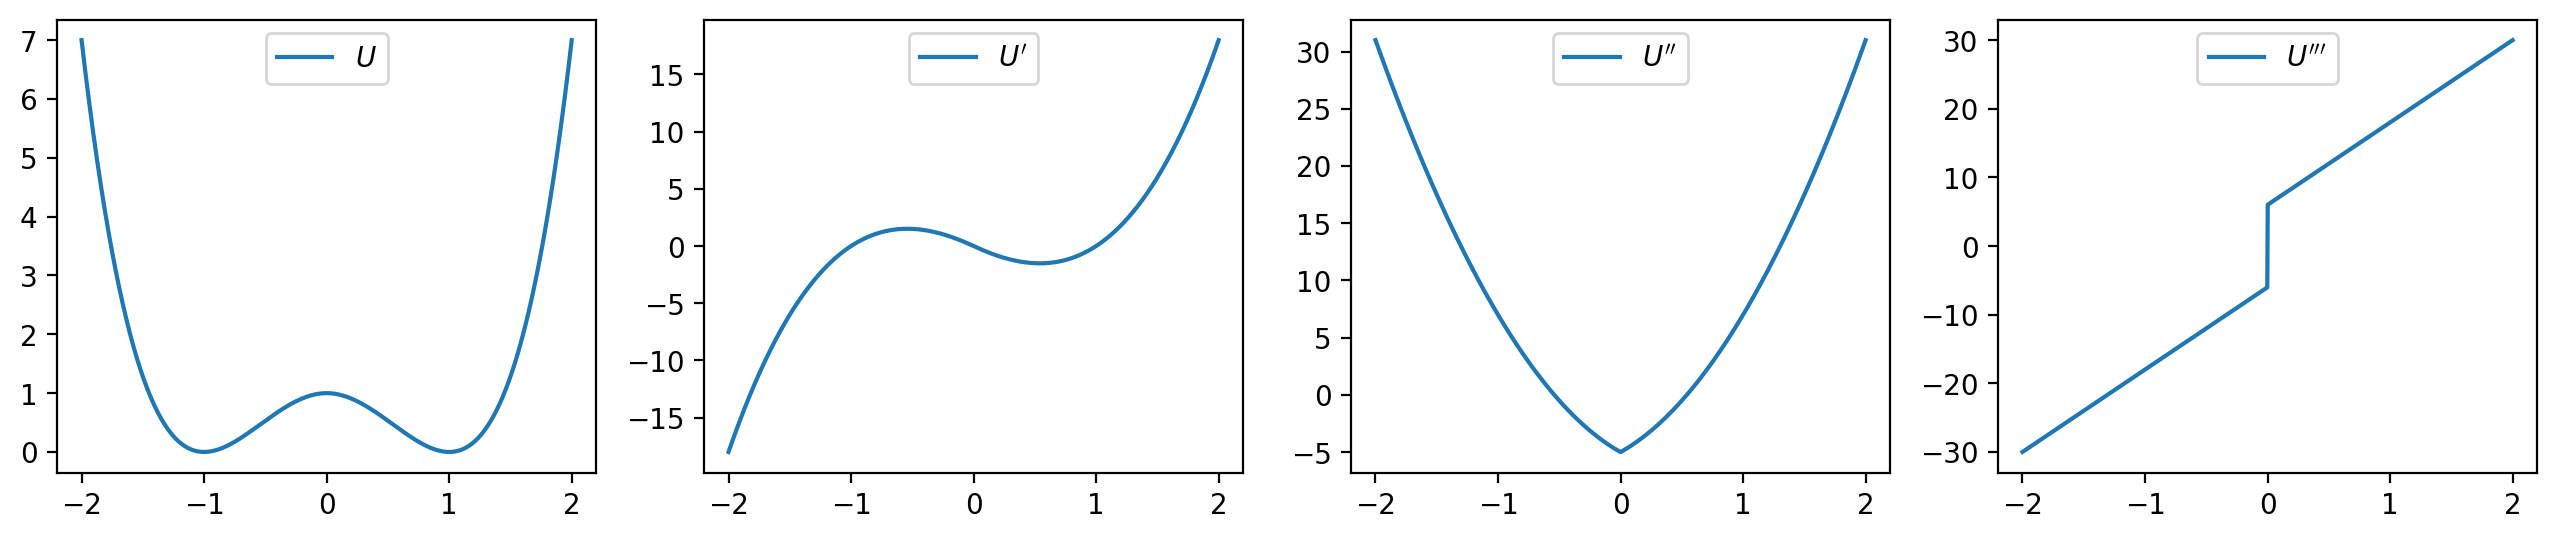

In [4]:
_U0 = 1
_r0 = 1
_k = 7*_U0/_r0**2

rs = np.linspace(-2, 2, 1000)

Us = sympy.lambdify([r, U0, r0, k], U_radial)(rs, _U0, _r0, _k)
dUs = sympy.lambdify([r, U0, r0, k], dU_radial)(rs, _U0, _r0, _k)
ddUs = sympy.lambdify([r, U0, r0, k], ddU_radial)(rs, _U0, _r0, _k)
dddUs = sympy.lambdify([r, U0, r0, k], dddU_radial)(rs, _U0, _r0, _k)

fig, ax = plt.subplots(1, 4, figsize=(16, 3), dpi=200)
ax[0].plot(rs, Us, label="$U$"); ax[0].legend(loc="upper center")
ax[1].plot(rs, dUs, label="$U'$"); ax[1].legend(loc="upper center")
ax[2].plot(rs, ddUs, label="$U''$"); ax[2].legend(loc="upper center")
ax[3].plot(rs, dddUs, label="$U'''$"); ax[3].legend(loc="upper center")
plt.show()

### Plot 2D potential

In [5]:
x = Symbol('x')
y = Symbol('y')
r = Function('r')(x,y)
xip = Symbol('xi_p')
xim = Symbol('xi_m')
Ux = Symbol('Ux')
#k = Function('k')(x,y)
k = (3*U0 / r0**2) * (2 + xip + xim*y/r)

U = (1 / (2*r0**4))*(r - r0)**2 * (k*r**2*r0**2 - 2*U0*(r-r0)*(3*r + r0))
U += Ux * ((x - r0) * (x + r0))**2
U = U.subs(r0, 1)

F = -Matrix([U.diff(x), U.diff(y)])
F = F.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
F[0] = F[0].simplify()
F[1] = F[1].simplify()
divF = (F[0].diff(x) + F[1].diff(y))
divF = divF.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
divF = divF.simplify().simplify()

### Generate force functions

In [6]:
x = Symbol('x')
y = Symbol('y')
r = Function('r')(x,y)
xip = Symbol('xip')
xim = Symbol('xim')
Ux = Symbol('Ux')
#k = Function('k')(x,y)
k = (3*U0 / r0**2) * (2 + xip + xim*y/r)

U = (1 / (2*r0**4))*(r - r0)**2 * (k*r**2*r0**2 - 2*U0*(r-r0)*(3*r + r0))
U += Ux * ((x - r0) * (x + r0))**2
U = U.subs(r0, 1)

F = -Matrix([U.diff(x), U.diff(y)])
F = F.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
F[0] = F[0].simplify()
F[1] = F[1].simplify()
divF = (F[0].diff(x) + F[1].diff(y))
divF = divF.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
divF = divF.simplify().simplify()
divF = divF.subs(x**2 + y**2, r**2).simplify()

U = U.subs(r**2, Symbol('r2')).subs(r, Symbol('r'))
F = F.subs(r**2, Symbol('r2')).subs(r, Symbol('r'))
divF = divF.subs(r**2, Symbol('r2')).subs(r, Symbol('r'))

In [7]:
from sympy.printing.pycode import NumPyPrinter

py_U = NumPyPrinter().doprint(U).replace("numpy", "np")
py_Fx = NumPyPrinter().doprint(F[0]).replace("numpy", "np")
py_Fy = NumPyPrinter().doprint(F[1]).replace("numpy", "np")
py_div_F = NumPyPrinter().doprint(divF).replace("numpy", "np")

In [8]:
print(("""
def Upot(x, y):
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    return %s
def force_func(path):
    x, y = path[:, 0], path[:, 1]
    f = np.zeros(path.shape) 
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    f[:,0] = %s
    f[:,1] = %s
    div_f = %s
    return f, div_f
def force_vec(x, y):
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    fx = %s
    fy = %s
    return fx, fy
def divf(x, y):
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    _divf = %s
    return _divf
""" % (py_U, py_Fx, py_Fy, py_div_F, py_Fx, py_Fy, py_div_F)).strip())

def Upot(x, y):
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    return Ux*(x - 1)**2*(x + 1)**2 + (1/2)*(r - 1)**2*(3*U0*r2*(xip + 2 + xim*y/r) - 2*U0*(r - 1)*(3*r + 1))
def force_func(path):
    x, y = path[:, 0], path[:, 1]
    f = np.zeros(path.shape) 
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    f[:,0] = (1/2)*x*(U0*(r - 1)**2*(-6*r*(xip + 2) + 12*r - 3*xim*y - 4) + 2*U0*(r - 1)*(-3*r*(r*(xip + 2) + xim*y) + 2*(r - 1)*(3*r + 1)) - 8*Ux*r*(x - 1)*(x + 1))/r
    f[:,1] = (1/2)*U0*(r - 1)*(2*y*(-3*r*(r*(xip + 2) + xim*y) + 2*(r - 1)*(3*r + 1)) + (r - 1)*(3*xim*(-r2 + y**2) + 2*y*(-3*r*(xip + 2) + 6*r - 3*xim*y - 2)))/r
    div_f = (1/2)*(3*U0*xim*y - 3*U0*(3*x**2*xim*y - 6*x**2*xip + 4*x**2 + 3*xim*y**3 + 4*xim*y - 6*xip*y**2 + 4*y**2) + 4*r*(-9*U0*r*xim*y + 9*U0*r*xip - 6*U0*r - 6*U0*r2*xip - 6*U0*x**2*xip + 12*U0*xim*y - 6*U0*xip*y**2 - 3*U0*xip + 6*U0 - 6*Ux*x**2 + 2*Ux))/r
    return f, div_f
def force_vec(x, y):
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    fx = (1/2)*x*(U0*(r - 1)**

### Gradient of Lagrangian

$$
L(\mathbf{x}, \dot{\mathbf{x}}) = \frac{\beta \gamma}{4} \sum_{i=1}^d (\dot{x}_i - \gamma^{-1} f_i)^2 + \frac{1}{2\gamma} \sum_{i=1}^d \nabla_i f_i
$$

$$
\frac{\partial L}{\partial x_i} = \frac{\beta}{2} \sum_k  (\gamma^{-1} f_k - \dot{x}_k) \frac{\partial f_k}{\partial x_i} + \frac{1}{2\gamma} \frac{\partial}{\partial x_i} \nabla \cdot f
$$

$$
\frac{\partial L}{\partial \dot{x}_i} = \frac{\beta \gamma}{2} (\dot{x}_i - \gamma^{-1}  f_i )
$$

In [9]:
x = Symbol('x')
y = Symbol('y')
r = Function('r')(x,y)
xip = Symbol('xip')
xim = Symbol('xim')
Ux = Symbol('Ux')
#k = Function('k')(x,y)
k = (3*U0 / r0**2) * (2 + xip + xim*y/r)

U = (1 / (2*r0**4))*(r - r0)**2 * (k*r**2*r0**2 - 2*U0*(r-r0)*(3*r + r0))
U += Ux * ((x - r0) * (x + r0))**2
U = U.subs(r0, 1)

F = -Matrix([U.diff(x), U.diff(y)])
F = F.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
F[0] = F[0].simplify()
F[1] = F[1].simplify()
divF = (F[0].diff(x) + F[1].diff(y))
divF = divF.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
divF = divF.simplify().simplify()
divF = divF.subs(x**2 + y**2, r**2).simplify()

#U = U.subs(r**2, Symbol('r2')).subs(r, Symbol('r'))
#F = F.subs(r**2, Symbol('r2')).subs(r, Symbol('r'))
#divF = divF.subs(r**2, Symbol('r2')).subs(r, Symbol('r'))

$$ (df)_{ij} = \frac{\partial f_i}{\partial x_j} $$

In [10]:
dF = zeros(dim,dim)
deps = [x, y]

for i in range(dim):
    for j in range(dim):
        dF[i,j] = F[i].diff(deps[j]).simplify()
        dF[i,j] = dF[i,j].subs(r.diff(x), x/r).subs(r.diff(y), y/r).simplify()
        dF[i,j] = dF[i,j].subs(x**2 + y**2, r**2).simplify()

In [11]:
dF_strs = []

for i in range(dim):
    for j in range(dim):
        _dfij = dF[i,j].subs(r**2, Symbol('r2')).subs(r, Symbol('r'))
        dfij_str = NumPyPrinter().doprint(_dfij).replace("numpy", "np")
        dF_strs.append("dF[%s,%s,:]=%s" % ( i, j, dfij_str))
        
dF_str = "\n        ".join(dF_strs)

$$
\frac{\partial}{\partial x_i} \nabla \cdot f
$$

In [12]:
ddivF = zeros(dim, 1)

for i in range(dim):
    ddivF[i] = divF.diff(deps[i]).simplify()
    ddivF[i] = ddivF[i].subs(r.diff(x), x/r).subs(r.diff(y), y/r).simplify()
    ddivF[i] = ddivF[i].subs(x**2 + y**2, r**2).simplify()

In [13]:
ddivF_str = []

for i in range(dim):
    _ddivfij = ddivF[i].subs(r**2, Symbol('r2')).subs(r, Symbol('r'))
    ddivf_str = NumPyPrinter().doprint(_ddivfij).replace("numpy", "np")
    ddivF_str.append("ddivF[%s,:]=%s" % ( i, ddivf_str))
        
ddivF_str = "\n        ".join(ddivF_str)

In [14]:
print(("""
def lagrangian(ls, dxls, dvls, path, us, args):
    xs, vs = path
    vs *= _vs_rescaling
    fs, div_f = force_func(xs.T)
    fs = fs.T
    
    vs_minus_f = vs - fs/gamma
    FW_term = _FW_factor * np.einsum("ij,ij->j", vs_minus_f, vs_minus_f)
    OM_term = _OM_factor * div_f
    
    ls[:] = _time_jacobian_factor * (FW_term + OM_term)
    
    if not dxls is None:
        x, y = xs
        r2 = xs[0,:]**2 + xs[1,:]**2
        r = np.sqrt(r2)
        
        ## Compute dL/dx
        
        dF = np.zeros( (dim, dim, len(us)) )
        %s
        
        ddivF = np.zeros( (dim, len(us)) )
        %s
        
        FW_term = - (beta/2) * np.einsum("ik,ijk->jk", vs_minus_f, dF)
        OM_term = _OM_factor*ddivF
        dxls[:] = _time_jacobian_factor * (FW_term + OM_term)
        
        ## Compute dL/dv
        
        dvls[:] = _time_jacobian_factor * _FW_factor * 2 * vs_minus_f
        
""" % (dF_str, ddivF_str)).strip())

def lagrangian(ls, dxls, dvls, path, us, args):
    xs, vs = path
    vs *= _vs_rescaling
    fs, div_f = force_func(xs.T)
    fs = fs.T
    
    vs_minus_f = vs - fs/gamma
    FW_term = _FW_factor * np.einsum("ij,ij->j", vs_minus_f, vs_minus_f)
    OM_term = _OM_factor * div_f
    
    ls[:] = _time_jacobian_factor * (FW_term + OM_term)
    
    if not dxls is None:
        x, y = xs
        r2 = xs[0,:]**2 + xs[1,:]**2
        r = np.sqrt(r2)
        
        ## Compute dL/dx
        
        dF = np.zeros( (dim, dim, len(us)) )
        dF[0,0,:]=(1/2)*(-3*U0*r2*(3*x**2*xim*y - 6*x**2*xip + 4*x**2 + xim*y) + 3*U0*x**2*xim*y + r**3*(-9*U0*r*xim*y + 18*U0*r*xip - 12*U0*r - 12*U0*r2*xip - 24*U0*x**2*xip + 12*U0*xim*y - 6*U0*xip + 12*U0 - 24*Ux*x**2 + 8*Ux))/r**3
        dF[0,1,:]=(3/2)*U0*x*(r2*(4*r*xim - 8*r*xip*y - 3*r2*xim - 3*xim*y**2 - xim + 6*xip*y - 4*y) + xim*y**2)/r**3
        dF[1,0,:]=(3/2)*U0*x*(4*r**3*xim - 8*r**3*xip*y - 3*r2**2*xim - 3*r2*xim*y**2 - r2*xim + 6*r2*xip*y - 

### Gradient of the action

In [15]:
dim = 2

In [16]:
g = Symbol('gamma')
b = Symbol('beta')

x, y = symbols('x y')
xdot, ydot = symbols('xdot ydot')

coords = [x, y]
dcoords = [xdot, ydot]

In [17]:
r = Function('r')(x,y)
xip = Symbol('xip')
xim = Symbol('xim')
Ux = Symbol('U_x')
#k = Function('k')(x,y)
k = (3*U0 / r0**2) * (2 + xip + xim*y/r)

U = (1 / (2*r0**4))*(r - r0)**2 * (k*r**2*r0**2 - 2*U0*(r-r0)*(3*r + r0))
U += Ux * ((x - r0) * (x + r0))**2
U = U.subs(r0, 1)

F = -Matrix([U.diff(x), U.diff(y)])
F = F.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
F[0] = F[0].simplify()
F[1] = F[1].simplify()
divF = (F[0].diff(x) + F[1].diff(y))
divF = divF.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
divF = divF.simplify().simplify()
divF = divF.subs(x**2 + y**2, r**2).simplify()

In [18]:
L_OM = (b*g/4) * ( (xdot - F[0]/g)**2 + (ydot - F[1]/g)**2 ) + (1/(2*g)) * divF
L_FW = (b*g/4) * ( (xdot - F[0]/g)**2 + (ydot - F[1]/g)**2 ) + (1/(2*g))

L_OM = L_OM.simplify()
L_FW = L_FW.simplify()

In [19]:
def get_L_derivs(L):
    L_x = zeros(dim, 1)
    L_xd = zeros(dim, 1)

    for i in range(dim):
        L_x[i] = L.diff(coords[i]).subs(r.diff(coords[i]), coords[i]/r).simplify()
        L_x[i] = L_x[i].subs(r, Symbol('r'))
        
        L_xd[i] = L.diff(dcoords[i]).simplify()
        L_xd[i] = L_xd[i].subs(r, Symbol('r'))
            
    return L_x, L_xd

L_x_OM, L_xd_OM = get_L_derivs(L_OM)
L_x_FW, L_xd_FW = get_L_derivs(L_FW)

In [20]:
def to_pycode(s):
    return sympy.printing.pycode(s)

In [21]:
py_exprs = []

for i in range(dim):
    py_exprs.append(L_x_OM[i])
    py_exprs.append(L_xd_OM[i])
        
for i in range(dim):
    py_exprs.append(L_x_FW[i])
    py_exprs.append(L_xd_FW[i])
        
py_exprs = list(map(to_pycode, py_exprs))

In [22]:
L_derivs_OM_str = """
def L_derivs_OM(path, dpath):
    x, y = path[:, 0], path[:, 1]
    xdot, ydot = dpath[:, 0], dpath[:, 1]
    r = np.sqrt(x**2 + y**2)
    L_x = np.zeros((%s, len(path)))
    L_xd = np.zeros((%s, len(path)))
""" % (dim, dim)

for i in range(dim):
    L_derivs_OM_str += "    L_x[%s] = %s\n" % (i, to_pycode(L_x_OM[i]))
    L_derivs_OM_str += "    L_xd[%s] = %s\n" % (i, to_pycode(L_xd_OM[i]))

L_derivs_OM_str += "    return L_x, L_xd"

In [23]:
L_derivs_FW_str = """
def L_derivs_FW(path, dpath):
    x, y = path[:, 0], path[:, 1]
    xdot, ydot = dpath[:, 0], dpath[:, 1]
    r = np.sqrt(x**2 + y**2)
    L_x = np.zeros((%s, len(path)))
    L_xd = np.zeros((%s, len(path)))
""" % (dim, dim)

for i in range(dim):
    L_derivs_FW_str += "    L_x[%s] = %s\n" % (i, to_pycode(L_x_FW[i]))
    L_derivs_FW_str += "    L_xd[%s] = %s\n" % (i, to_pycode(L_xd_FW[i]))

L_derivs_FW_str += "    return L_x, L_xd"

In [24]:
print("%s%s" % (L_derivs_OM_str, L_derivs_FW_str))


def L_derivs_OM(path, dpath):
    x, y = path[:, 0], path[:, 1]
    xdot, ydot = dpath[:, 0], dpath[:, 1]
    r = np.sqrt(x**2 + y**2)
    L_x = np.zeros((2, len(path)))
    L_xd = np.zeros((2, len(path)))
    L_x[0] = (1/8)*(r*(beta*(x*(U0*(r - 1)*(2*y*(3*r*(r*(xip + 2) + xim*y) - 2*(r - 1)*(3*r + 1)) - (r - 1)*(3*xim*(-r**2 + y**2) - 2*y*(3*r*(xip + 2) - 6*r + 3*xim*y + 2))) + 2*gamma*r*ydot)*(U0*(r - 1)*(-3*xim*(-r**2 + y**2) + 2*y*(3*r*(xip + 2) - 6*r + 3*xim*y + 2) + 2*y*(6*r*(xip + 2) - 12*r + 3*xim*y + 4) + 6*(r - 1)*(r*xim + xip*y)) + U0*(2*y*(3*r*(r*(xip + 2) + xim*y) - 2*(r - 1)*(3*r + 1)) - (r - 1)*(3*xim*(-r**2 + y**2) - 2*y*(3*r*(xip + 2) - 6*r + 3*xim*y + 2))) + 2*gamma*ydot) + (2*gamma*r*xdot + x*(U0*(r - 1)**2*(6*r*(xip + 2) - 12*r + 3*xim*y + 4) + 2*U0*(r - 1)*(3*r*(r*(xip + 2) + xim*y) - 2*(r - 1)*(3*r + 1)) + 8*U_x*r*(x - 1)*(x + 1)))*(2*gamma*x*xdot + r*(U0*(r - 1)**2*(6*r*(xip + 2) - 12*r + 3*xim*y + 4) + 2*U0*(r - 1)*(3*r*(r*(xip + 2) + xim*y) - 2*(r - 1)*(3*r + 

### Second variation

In [25]:
dim = 2

In [26]:
g = Symbol('gamma')
b = Symbol('beta')

x, y = symbols('x y')
xdot, ydot = symbols('xdot ydot')

coords = [x, y]
dcoords = [xdot, ydot]

In [27]:
r = Function('r')(x,y)
xip = Symbol('xip')
xim = Symbol('xim')
Ux = Symbol('U_x')
#k = Function('k')(x,y)
k = (3*U0 / r0**2) * (2 + xip + xim*y/r)

U = (1 / (2*r0**4))*(r - r0)**2 * (k*r**2*r0**2 - 2*U0*(r-r0)*(3*r + r0))
U += Ux * ((x - r0) * (x + r0))**2
U = U.subs(r0, 1)

F = -Matrix([U.diff(x), U.diff(y)])
F = F.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
F[0] = F[0].simplify()
F[1] = F[1].simplify()
divF = (F[0].diff(x) + F[1].diff(y))
divF = divF.subs(r.diff(x), x/r).subs(r.diff(y), y/r)
divF = divF.simplify().simplify()
divF = divF.subs(x**2 + y**2, r**2).simplify()

In [28]:
L_OM = (b*g/4) * ( (xdot - F[0]/g)**2 + (ydot - F[1]/g)**2 ) + (1/(2*g)) * divF
L_FW = (b*g/4) * ( (xdot - F[0]/g)**2 + (ydot - F[1]/g)**2 ) + (1/(2*g))

L_OM = L_OM.simplify()
L_FW = L_FW.simplify()

In [29]:
def get_L_2nd_derivs(L):
    L_x_x = zeros(dim,dim)
    L_xd_x = zeros(dim,dim)
    L_xd_xd = zeros(dim,dim)

    for i in range(dim):
        for j in range(dim):
            foo = L.diff(coords[i]).subs(r.diff(coords[i]), coords[i]/r).simplify()
            foo = foo.diff(coords[j]).subs(r.diff(coords[j]), coords[j]/r).simplify()
            L_x_x[i,j] = foo#.subs(r.diff(coords[i]), coords[i]/r).subs(r.diff(coords[j]), coords[j]/r)
            L_x_x[i,j] = L_x_x[i,j].subs(r, Symbol('r'))

            foo = L.diff(dcoords[i]).simplify()
            foo = foo.diff(coords[j]).subs(r.diff(coords[j]), coords[j]/r).simplify()
            L_xd_x[i,j] = foo#.subs(r.diff(coords[j]), coords[j]/r)
            L_xd_x[i,j] = L_xd_x[i,j].subs(r, Symbol('r'))

            foo = L.diff(dcoords[i]).simplify()
            foo = foo.diff(dcoords[j]).simplify()
            L_xd_xd[i,j] = foo
            L_xd_xd[i,j] = L_xd_xd[i,j].subs(r, Symbol('r'))
            
    return L_x_x, L_xd_x, L_xd_xd

L_x_x_OM, L_xd_x_OM, L_xd_xd_OM = get_L_2nd_derivs(L_OM)
L_x_x_FW, L_xd_x_FW, L_xd_xd_FW = get_L_2nd_derivs(L_FW)

In [30]:
def to_pycode(s):
    return sympy.printing.pycode(s)

In [31]:
#py_force_exprs = [U_expr, F_expr, divF_expr]

py_exprs = []

for i in range(dim):
    for j in range(dim):
        py_exprs.append(L_x_x_OM[i,j])
        py_exprs.append(L_xd_x_OM[i,j])
        py_exprs.append(L_xd_xd_OM[i,j])
        
for i in range(dim):
    for j in range(dim):
        py_exprs.append(L_x_x_FW[i,j])
        py_exprs.append(L_xd_x_FW[i,j])
        py_exprs.append(L_xd_xd_FW[i,j])
        
py_exprs = list(map(to_pycode, py_exprs))

In [32]:
L_2nd_derivs_OM_str = """
def L_2nd_derivs_OM(path, dpath):
    x, y = path[:, 0], path[:, 1]
    xdot, ydot = dpath[:, 0], dpath[:, 1]
    r = np.sqrt(x**2 + y**2)
    L_x_x = np.zeros((%s, %s, len(path)))
    L_xd_x = np.zeros((%s, %s, len(path)))
    L_xd_xd = np.zeros((%s, %s, len(path)))
""" % (dim, dim, dim, dim, dim, dim)

for i in range(dim):
    for j in range(dim):
        L_2nd_derivs_OM_str += "    L_x_x[%s,%s] = %s\n" % (i,j, to_pycode(L_x_x_OM[i,j]))
        L_2nd_derivs_OM_str += "    L_xd_x[%s,%s] = %s\n" % (i,j, to_pycode(L_xd_x_OM[i,j]))
        L_2nd_derivs_OM_str += "    L_xd_xd[%s,%s] = %s\n" % (i,j, to_pycode(L_xd_xd_OM[i,j]))

L_2nd_derivs_OM_str += "    return L_x_x, L_xd_x, L_xd_xd"

In [33]:
L_2nd_derivs_FW_str = """
def L_2nd_derivs_FW(path, dpath):
    x, y = path[:, 0], path[:, 1]
    xdot, ydot = dpath[:, 0], dpath[:, 1]
    r = np.sqrt(x**2 + y**2)
    L_x_x = np.zeros((%s, %s, len(path)))
    L_xd_x = np.zeros((%s, %s, len(path)))
    L_xd_xd = np.zeros((%s, %s, len(path)))
""" % (dim, dim, dim, dim, dim, dim)

for i in range(dim):
    for j in range(dim):
        L_2nd_derivs_FW_str += "    L_x_x[%s,%s] = %s\n" % (i,j, to_pycode(L_x_x_FW[i,j]))
        L_2nd_derivs_FW_str += "    L_xd_x[%s,%s] = %s\n" % (i,j, to_pycode(L_xd_x_FW[i,j]))
        L_2nd_derivs_FW_str += "    L_xd_xd[%s,%s] = %s\n" % (i,j, to_pycode(L_xd_xd_FW[i,j]))
        
L_2nd_derivs_FW_str += "    return L_x_x, L_xd_x, L_xd_xd"

In [34]:
print("%s%s" % (L_2nd_derivs_OM_str, L_2nd_derivs_FW_str))


def L_2nd_derivs_OM(path, dpath):
    x, y = path[:, 0], path[:, 1]
    xdot, ydot = dpath[:, 0], dpath[:, 1]
    r = np.sqrt(x**2 + y**2)
    L_x_x = np.zeros((2, 2, len(path)))
    L_xd_x = np.zeros((2, 2, len(path)))
    L_xd_xd = np.zeros((2, 2, len(path)))
    L_x_x[0,0] = (1/8)*(27*U0**2*beta*r**10*xim**2 + 144*U0**2*beta*r**10*xip**2 - 90*U0**2*beta*r**9*xim**2 + 396*U0**2*beta*r**9*xim*xip*y - 432*U0**2*beta*r**9*xip**2 + 288*U0**2*beta*r**9*xip + 108*U0**2*beta*r**8*x**2*xim**2 + 1440*U0**2*beta*r**8*x**2*xip**2 + 189*U0**2*beta*r**8*xim**2*y**2 + 108*U0**2*beta*r**8*xim**2 - 1116*U0**2*beta*r**8*xim*xip*y + 360*U0**2*beta*r**8*xim*y + 288*U0**2*beta*r**8*xip**2*y**2 + 468*U0**2*beta*r**8*xip**2 - 720*U0**2*beta*r**8*xip + 144*U0**2*beta*r**8 - 270*U0**2*beta*r**7*x**2*xim**2 + 2160*U0**2*beta*r**7*x**2*xim*xip*y - 3240*U0**2*beta*r**7*x**2*xip**2 + 2160*U0**2*beta*r**7*x**2*xip - 486*U0**2*beta*r**7*xim**2*y**2 - 54*U0**2*beta*r**7*xim**2 + 324*U0**2*beta*r**7*xim*xip*y**3 +